# Importing & Installing Relevant Libraries

In [1]:
# !pip install python-docx
# # Install SHAP
# !pip install shap
#!pip install xgboost
# !pip install lightgbm
# !pip install catboost


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
import catboost as cb
from docx import Document
from mord import LogisticAT


# Input Variables Initialization

In [3]:
#file path for finale merged dataset
file_path= r'D:\DICAR-Thesis+Internship\Final Dataset\Merged_Final_Dataset.xlsx'

# Define a threshold for the percentage of non-zero values required for each column. columns having non-zerovalues 
# less than the specified thresold percentage will be removed.
non_zero_val_threshold=1;

#define the specific columns that you want to remove
columns_to_remove = ['ID', 'TIMESTAMP [ms]', 'TIMESTAMP_INITIAL', 'TIMESTAMP_FINAL', 'ID_Semantic',  'ID_Line', 'line_full_id',
                     'line_osm_id', 'ID_Point', 'point_full_id', 'point_osm_id',  'ID_Polygon', 'polygon_full_id', 
                     'polygon_osm_id', 'poorSignal', 'delta', 'theta',  'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 
                     'lowGamma', 'midGamma', 'lon', 'lat',  'GLANCE_DURATION', 'T(Â°)', 'AngleX(deg)', 'AngleY(deg)', 
                     'AngleZ(deg)', 'Yaw',  'polygon_leisure', 'point_waste', 'line_smoothness', 'polygon_barrier', 
                     'line_wheelchair',  'line_osm_type', 'line_kerb', 'line_fence_type', 'polygon_addr_city', 
                     'line_temporary',  'point_kerb', 'polygon_roof_level', 'polygon_amenity', 'point_shop', 'point_osm_type', 
                     'polygon_source_add', 'point_railway', 'point_opening_ho', 'point_crossing_i',  'point_barrier',
                     'point_bicycle', 'point_lit', 'polygon_height', 'point_bollard',  'polygon_wheelchair', 
                     'polygon_historic', 'polygon_natural', 'point_bicycle_re',  'line_material', 'polygon_roof_heigh', 
                     'point_bicycle_pa', 'polygon_addr_stree',  'line_footway', 'line_maxspeed', 'line_height', 'point_bus', 
                     'line_lanes', 'line_sidewalk',  'point_entrance', 'polygon_addr_postc', 'line_cycleway']



# Set the desired explained variance threshold for retaining PCA components
variance_threshold = 0.95  # Change this value to adjust the threshold

# Feature Selection for Machine Learning

In [4]:
# Load the dataset
final_merged_df = pd.read_excel(file_path)

In [5]:
# Removing the specified columns
final_features = final_merged_df.drop(columns=columns_to_remove, errors='ignore')
# Display the first few rows of the cleaned dataset to confirm
final_features.head()

,ID_Glance,ID_GAZE_CLASS,GAZE_QUADRANT,ID_NEW_SEMANTIC_OBJ_CLASS,NEW_SEMANTIC_OBJ_QUADRANT,Binary_Scene_road,Binary_Scene_sidewalk,Binary_Scene_building,Binary_Scene_wall,Binary_Scene_fence,...,line_surface,line_barrier,line_segregated,point_amenity,point_natural,point_traffic_si,point_highway,point_crossing,polygon_building,polygon_landuse
0,0,2,7,2,1,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
1,0,9,7,9,6,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
2,1,13,1,1,1,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
3,1,13,1,1,1,1,0,1,1,0,...,0,0,0,2,0,0,0,0,0,0
4,1,13,1,13,1,1,1,1,0,0,...,0,0,0,2,0,0,0,0,0,0


### Removing columns with non-zero values less than threshold percentage

In [6]:
# Calculate the percentage of non-zero values for each column
non_zero_percentage = (final_features != 0).sum(axis=0) / len(final_features) * 100

# Identify columns with non-zero values less than threshold percentage
columns_to_remove = non_zero_percentage[non_zero_percentage < non_zero_val_threshold].index.tolist()

# Remove the identified columns
final_features_cleaned = final_features.drop(columns=columns_to_remove)

# Display the first few rows of the cleaned dataset to confirm
columns_to_remove

['Shape_train', 'line_sidewalk_r', 'line_sidewalk_l']

In [7]:
final_features_cleaned.head()

,ID_Glance,ID_GAZE_CLASS,GAZE_QUADRANT,ID_NEW_SEMANTIC_OBJ_CLASS,NEW_SEMANTIC_OBJ_QUADRANT,Binary_Scene_road,Binary_Scene_sidewalk,Binary_Scene_building,Binary_Scene_wall,Binary_Scene_fence,...,line_surface,line_barrier,line_segregated,point_amenity,point_natural,point_traffic_si,point_highway,point_crossing,polygon_building,polygon_landuse
0,0,2,7,2,1,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
1,0,9,7,9,6,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
2,1,13,1,1,1,1,1,1,1,0,...,0,0,0,2,0,0,0,0,0,0
3,1,13,1,1,1,1,0,1,1,0,...,0,0,0,2,0,0,0,0,0,0
4,1,13,1,13,1,1,1,1,0,0,...,0,0,0,2,0,0,0,0,0,0


In [8]:
# final_feat_glance_id

In [9]:
# final_feat_meditation

In [10]:
# final_feat_attention

# Smoothing specific features with moving average

In [11]:
import pandas as pd

# Function to apply moving average to sensor data and remove non-smoothed versions
def apply_moving_average(df, sensor_columns, window_size=5):
    # Apply moving average and create smoothed columns
    for col in sensor_columns:
        df[col + '_smoothed'] = df[col].rolling(window=window_size).mean()  # Moving average of 5 rows

    # Drop rows with NaN values after applying moving average
    df = df.dropna().reset_index(drop=True)
    
    # Drop the original non-smoothed sensor columns
    df = df.drop(columns=sensor_columns)

    return df

# List of sensor columns
sensor_columns = ['ax(g)', 'ay(g)', 'az(g)', 'wx(deg/s)', 'wy(deg/s)', 'wz(deg/s)']

# Apply moving average to sensor data and remove non-smoothed columns
final_features_cleaned = apply_moving_average(final_features_cleaned, sensor_columns)



In [12]:
final_features_cleaned

,ID_Glance,ID_GAZE_CLASS,GAZE_QUADRANT,ID_NEW_SEMANTIC_OBJ_CLASS,NEW_SEMANTIC_OBJ_QUADRANT,Binary_Scene_road,Binary_Scene_sidewalk,Binary_Scene_building,Binary_Scene_wall,Binary_Scene_fence,...,point_highway,point_crossing,polygon_building,polygon_landuse,ax(g)_smoothed,ay(g)_smoothed,az(g)_smoothed,wx(deg/s)_smoothed,wy(deg/s)_smoothed,wz(deg/s)_smoothed
0,1,13,1,13,1,1,1,1,0,0,...,0,0,0,0,-0.056207,-0.157501,0.986738,0.206663,0.021623,-0.072454
1,1,13,1,13,1,1,1,1,0,0,...,0,0,0,0,-0.061837,-0.169617,0.986543,-0.039072,0.015070,-0.091429
2,1,7,1,7,1,0,0,1,1,0,...,0,0,0,0,-0.063182,-0.175831,0.985599,-0.142748,0.000187,-0.077611
3,1,7,1,7,1,1,0,1,1,0,...,0,0,0,0,-0.060796,-0.183280,0.984660,-0.179480,-0.003603,-0.050753
4,1,7,1,7,1,1,0,1,1,0,...,0,0,0,0,-0.064334,-0.187434,0.983553,-0.199674,-0.003776,0.061417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,1,14,1,14,1,1,1,1,0,1,...,0,0,0,0,-0.067381,-0.170530,0.982147,0.000000,0.000000,0.000000
11096,1,14,1,14,1,1,1,1,0,1,...,0,0,0,0,-0.067447,-0.169724,0.981546,0.000000,0.000000,0.000000
11097,1,14,1,14,1,1,1,1,0,1,...,0,0,0,0,-0.068358,-0.167979,0.980923,0.000000,0.000000,0.000000
11098,1,14,1,14,1,1,1,1,0,1,...,0,0,0,0,-0.069412,-0.163953,0.979888,0.000000,0.000000,0.000000


In [13]:
# Get the list of column names in the DataFrame
columns_list1 = final_features_cleaned.columns.tolist()

# Display the column names horizontally
print(" | ".join(columns_list1))

ID_Glance | ID_GAZE_CLASS | GAZE_QUADRANT | ID_NEW_SEMANTIC_OBJ_CLASS | NEW_SEMANTIC_OBJ_QUADRANT | Binary_Scene_road | Binary_Scene_sidewalk | Binary_Scene_building | Binary_Scene_wall | Binary_Scene_fence | Binary_Scene_pole | Binary_Scene_traffic light | Binary_Scene_traffic sign | Binary_Scene_vegetation | Binary_Scene_terrain | Binary_Scene_sky | Binary_Scene_person | Binary_Scene_rider | Binary_Scene_car | Binary_Scene_truck | Binary_Scene_bus | Binary_Scene_train | Binary_Scene_motorcycle | Binary_Scene_bicycle | Shape_road | Shape_sidewalk | Shape_building | Shape_wall | Shape_fence | Shape_pole | Shape_traffic light | Shape_traffic sign | Shape_vegetation | Shape_terrain | Shape_sky | Shape_person | Shape_rider | Shape_car | Shape_truck | Shape_bus | Shape_motorcycle | Shape_bicycle | meditation | attention | Speed | polygon_osm_type | line_highway | line_foot | line_bicycle | line_service | line_surface | line_barrier | line_segregated | point_amenity | point_natural | point_

In [14]:
# Remove rows where either 'meditation' or 'attention' is zero
final_features_cleaned = final_features_cleaned[
    (final_features_cleaned['meditation'] != 0) & (final_features_cleaned['attention'] != 0)
]

final_features_cleaned


,ID_Glance,ID_GAZE_CLASS,GAZE_QUADRANT,ID_NEW_SEMANTIC_OBJ_CLASS,NEW_SEMANTIC_OBJ_QUADRANT,Binary_Scene_road,Binary_Scene_sidewalk,Binary_Scene_building,Binary_Scene_wall,Binary_Scene_fence,...,point_highway,point_crossing,polygon_building,polygon_landuse,ax(g)_smoothed,ay(g)_smoothed,az(g)_smoothed,wx(deg/s)_smoothed,wy(deg/s)_smoothed,wz(deg/s)_smoothed
68,2,7,1,7,1,1,1,1,1,1,...,0,0,0,0,-0.059753,-0.171317,0.987906,0.088971,0.021422,-0.037859
69,2,7,1,7,1,1,1,1,1,1,...,0,0,0,0,-0.063609,-0.159200,0.987304,-0.137436,0.035867,-0.152352
70,2,7,1,1,1,1,1,1,1,1,...,0,0,0,0,-0.064598,-0.155262,0.987753,-0.359744,0.025236,-0.052970
71,2,7,1,7,1,1,1,1,1,1,...,0,0,0,0,-0.062758,-0.161297,0.987086,-0.336831,0.007882,0.068565
72,2,7,1,7,1,1,1,1,1,1,...,0,0,0,0,-0.063519,-0.155088,0.986203,-0.374576,0.005228,0.048217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,0,15,7,1,4,1,1,1,0,1,...,0,0,0,1,-0.138274,-0.019427,1.115588,4.980040,1.779175,7.279830
3018,0,19,7,1,5,1,1,1,0,1,...,0,0,0,1,-0.152988,-0.008590,1.009878,6.376118,2.618885,3.014964
3019,2,14,7,1,5,1,1,1,0,1,...,0,0,0,1,-0.139582,-0.006276,0.946662,7.149485,2.102788,-1.962641
3020,2,14,7,14,7,1,1,1,0,1,...,0,0,0,1,-0.145112,-0.018307,0.926697,6.425930,0.932102,-6.139548


# Applying PCA

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Separate the dataset into map features (starting with point_, line_, Polygon_) and sensor features (remaining features)
def separate_datasets(df):
    # Separate map features
    map_columns = [col for col in df.columns if col.startswith(('point_', 'line_', 'polygon_'))]
    map_df = df[map_columns]

    # Remaining features will be considered as sensor data
    sensor_df = df.drop(columns=map_columns)
    
    return map_df, sensor_df

# Step 2: Apply PCA on map data and retain components explaining 99% variability
def apply_pca_on_map(map_df, variance_threshold=0.99):
    # Standardize the map data
    scaler = StandardScaler()
    scaled_map_features = scaler.fit_transform(map_df)
    
    # Apply PCA
    pca = PCA(n_components=variance_threshold)
    map_features_pca = pca.fit_transform(scaled_map_features)

    # Display the number of components retained
    n_components_retained = pca.n_components_
    print(f"Number of PCA components retained: {n_components_retained}")
    
    # Scree plot for PCA
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100}% Threshold')
    plt.title('Scree Plot: Cumulative Variance Explained by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.grid(True)
    plt.show()

    # Return PCA-transformed map data and PCA model
    return map_features_pca, pca

# Step 3: Combine PCA-transformed map features with sensor data
def combine_pca_and_sensor_data(sensor_df, map_features_pca):
    # Convert PCA components to DataFrame
    pca_df = pd.DataFrame(map_features_pca, columns=[f'PC{i+1}' for i in range(map_features_pca.shape[1])])
    
    # Combine sensor data and PCA components
    final_combined_df = pd.concat([sensor_df.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
    
    return final_combined_df




# Applying Machine Learning Algorithms for Meditation & Attention

Number of PCA components retained: 9


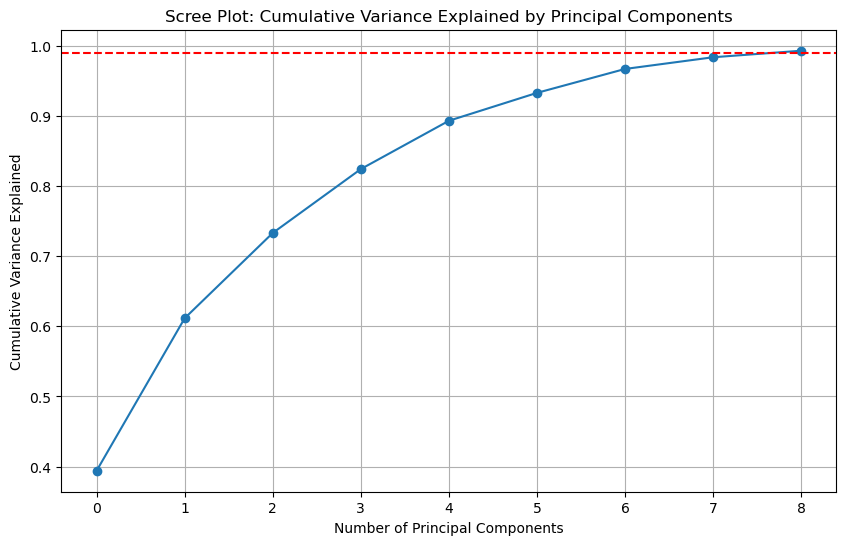


XGBoost - Prediction Summary for Target Variable: MEDITATION
Mean Squared Error: 38.1365
R-squared (Accuracy): 0.8508


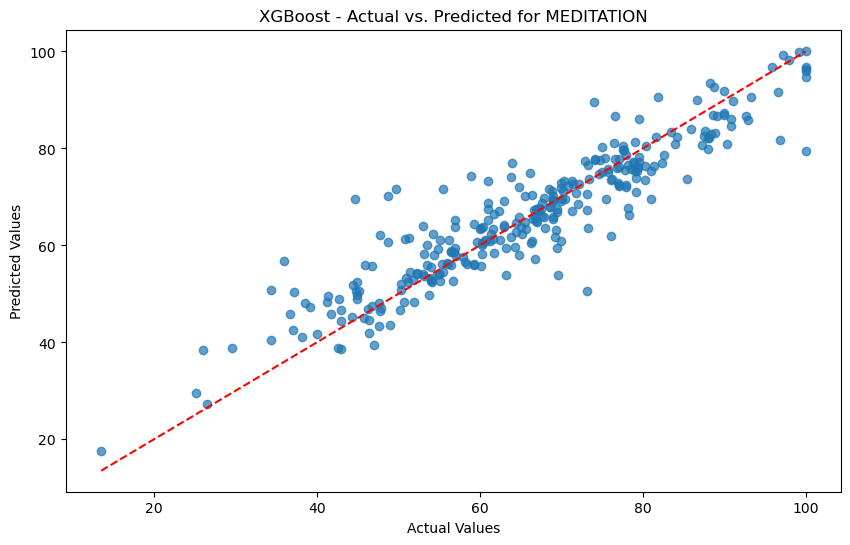


RandomForest - Prediction Summary for Target Variable: MEDITATION
Mean Squared Error: 38.7447
R-squared (Accuracy): 0.8484


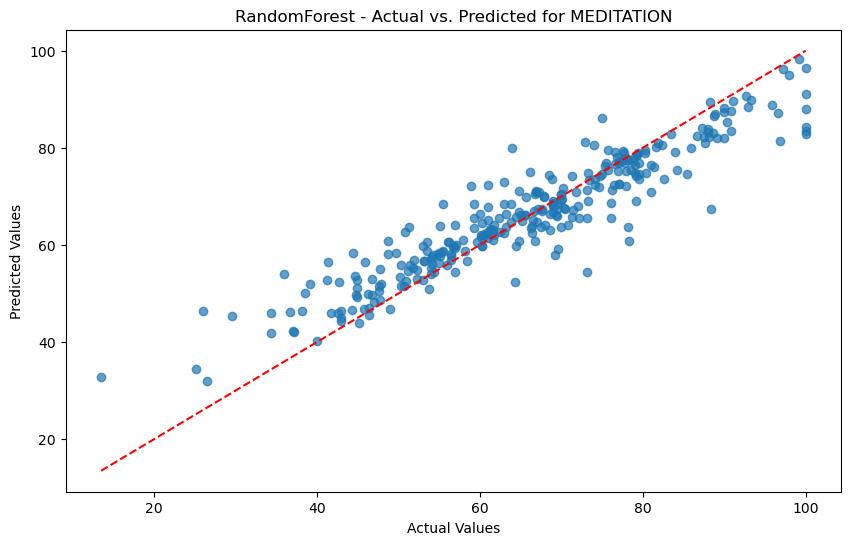


Gradient Boosting Regressor - Prediction Summary for Target Variable: MEDITATION
Mean Squared Error: 114.7347
R-squared (Accuracy): 0.5510


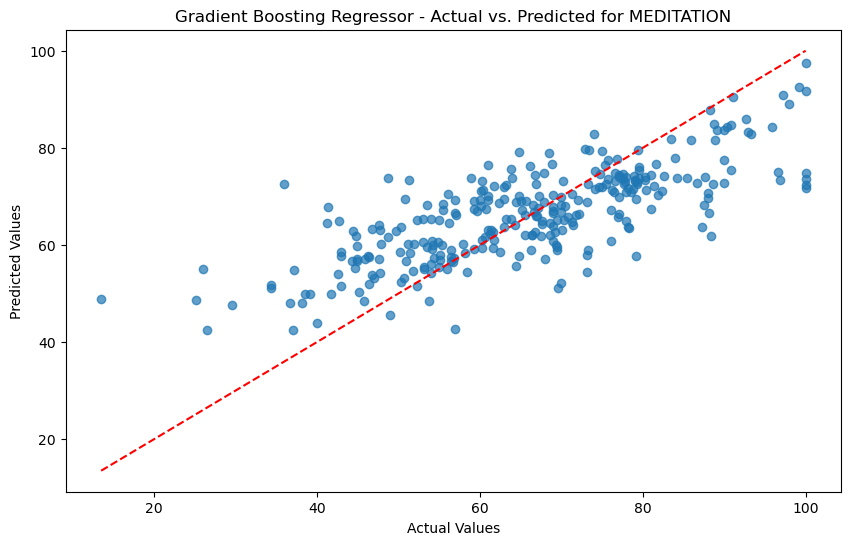

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4683
[LightGBM] [Info] Number of data points in the train set: 2658, number of used features: 54
[LightGBM] [Info] Start training from score 66.318846

LightGBM - Prediction Summary for Target Variable: MEDITATION
Mean Squared Error: 39.4650
R-squared (Accuracy): 0.8456


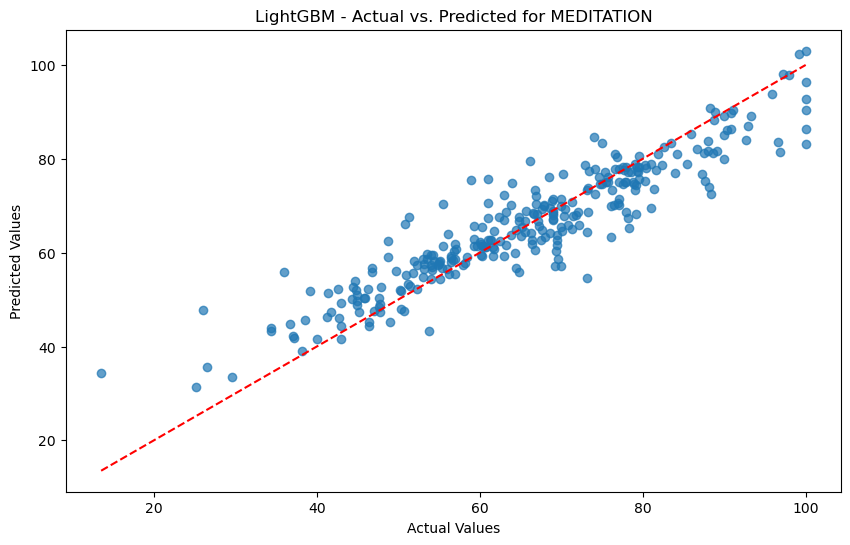


CatBoost - Prediction Summary for Target Variable: MEDITATION
Mean Squared Error: 34.3153
R-squared (Accuracy): 0.8657


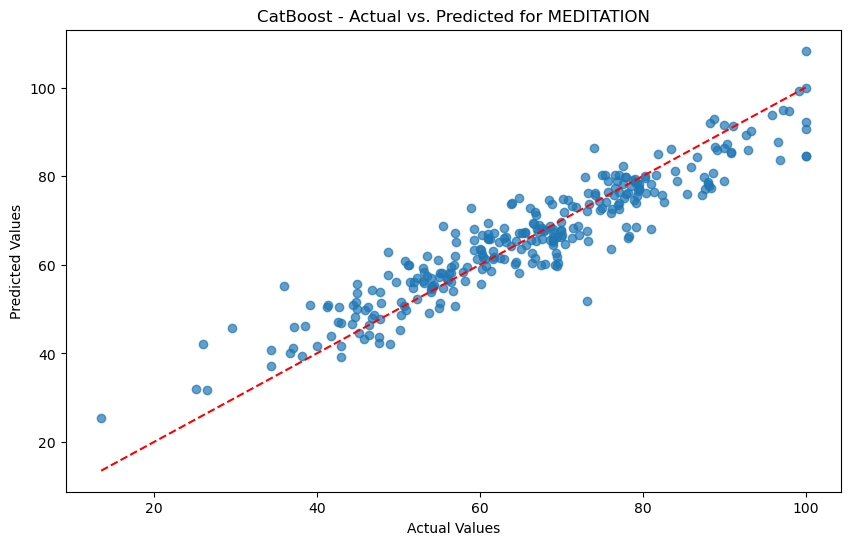


KNN Regressor - Prediction Summary for Target Variable: MEDITATION
Mean Squared Error: 92.6047
R-squared (Accuracy): 0.6376


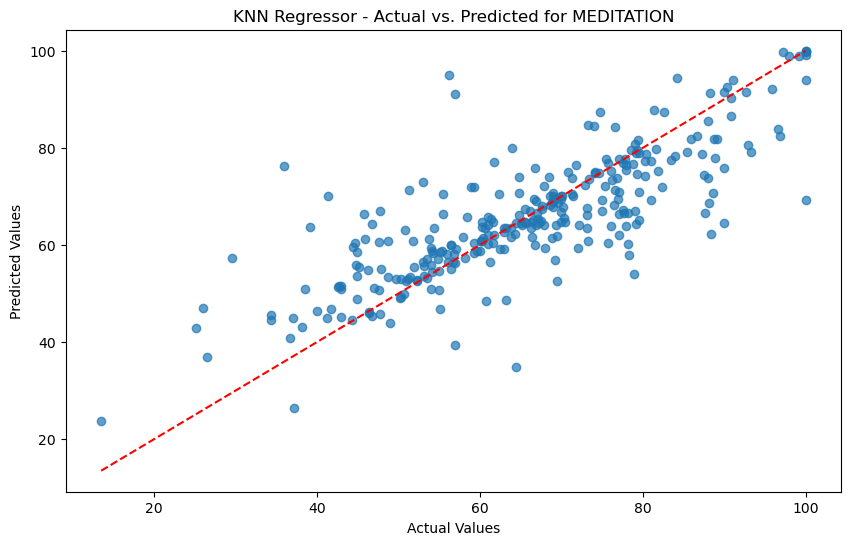


XGBoost - Prediction Summary for Target Variable: ATTENTION
Mean Squared Error: 48.5651
R-squared (Accuracy): 0.8165


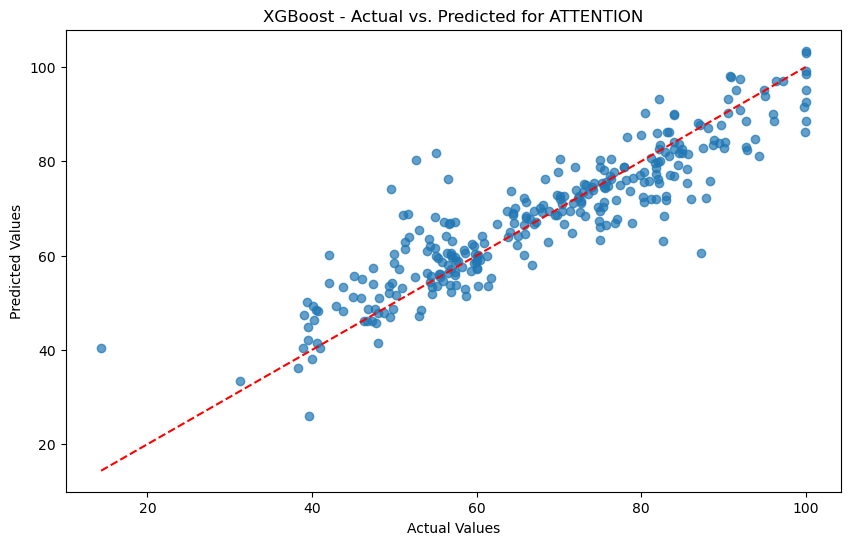


RandomForest - Prediction Summary for Target Variable: ATTENTION
Mean Squared Error: 39.9333
R-squared (Accuracy): 0.8491


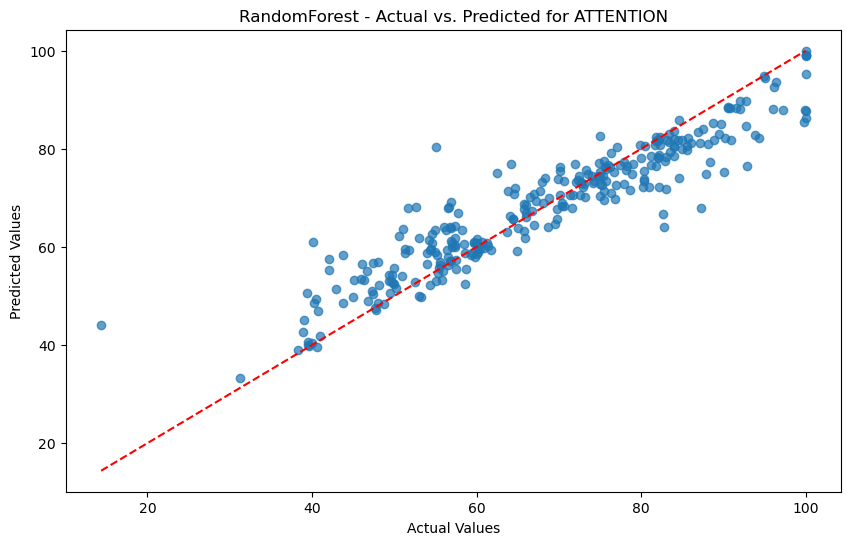


Gradient Boosting Regressor - Prediction Summary for Target Variable: ATTENTION
Mean Squared Error: 106.0408
R-squared (Accuracy): 0.5992


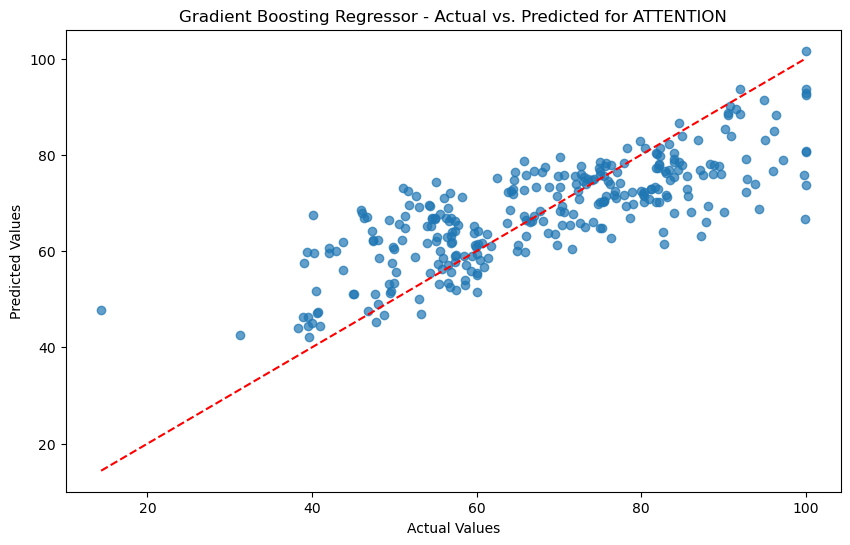

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4683
[LightGBM] [Info] Number of data points in the train set: 2658, number of used features: 54
[LightGBM] [Info] Start training from score 67.511732

LightGBM - Prediction Summary for Target Variable: ATTENTION
Mean Squared Error: 51.5292
R-squared (Accuracy): 0.8052


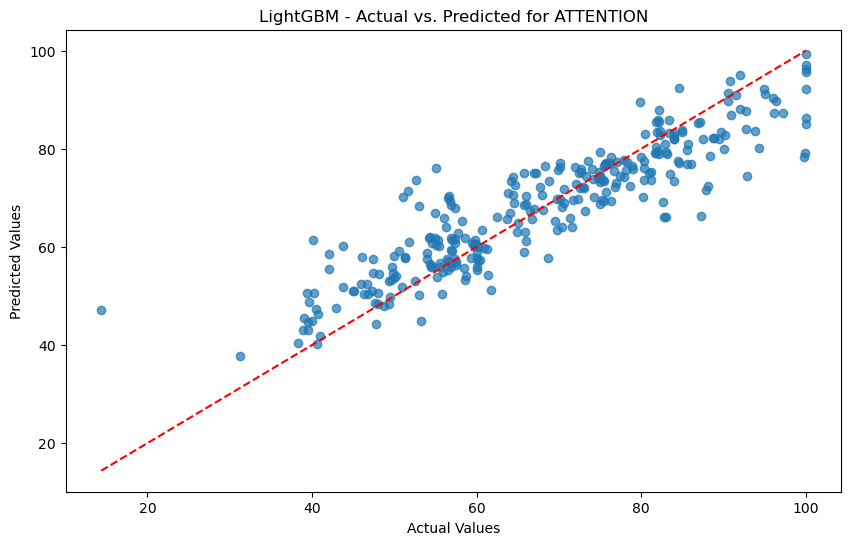


CatBoost - Prediction Summary for Target Variable: ATTENTION
Mean Squared Error: 41.1194
R-squared (Accuracy): 0.8446


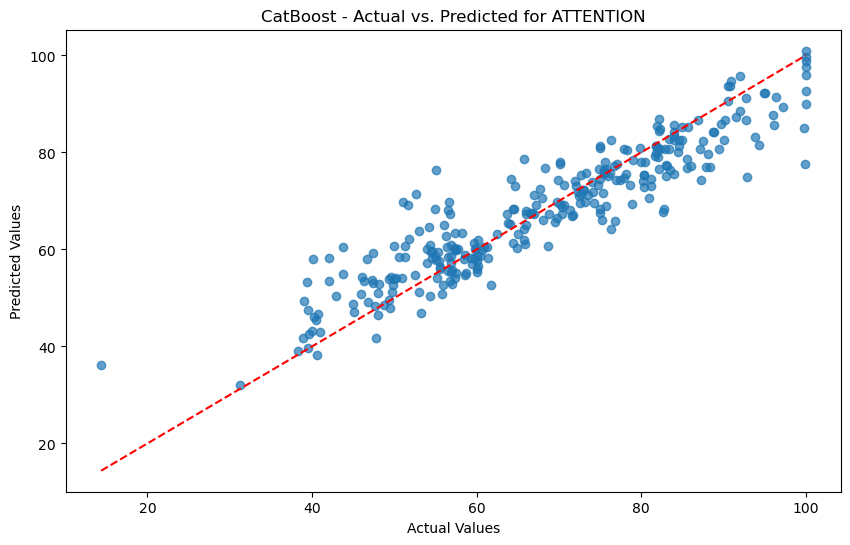


KNN Regressor - Prediction Summary for Target Variable: ATTENTION
Mean Squared Error: 91.0636
R-squared (Accuracy): 0.6558


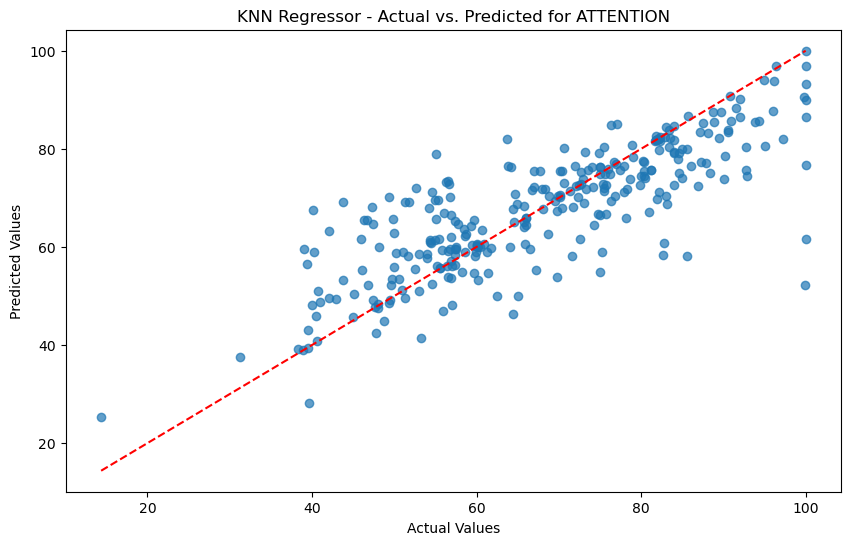


Accuracy (R-squared) for Each Model and Target Variable:
                             meditation  attention
XGBoost                        0.850762   0.816451
RandomForest                   0.848382   0.849075
Gradient Boosting Regressor    0.551012   0.599226
LightGBM                       0.845563   0.805249
CatBoost                       0.865715   0.844592
KNN Regressor                  0.637613   0.655831


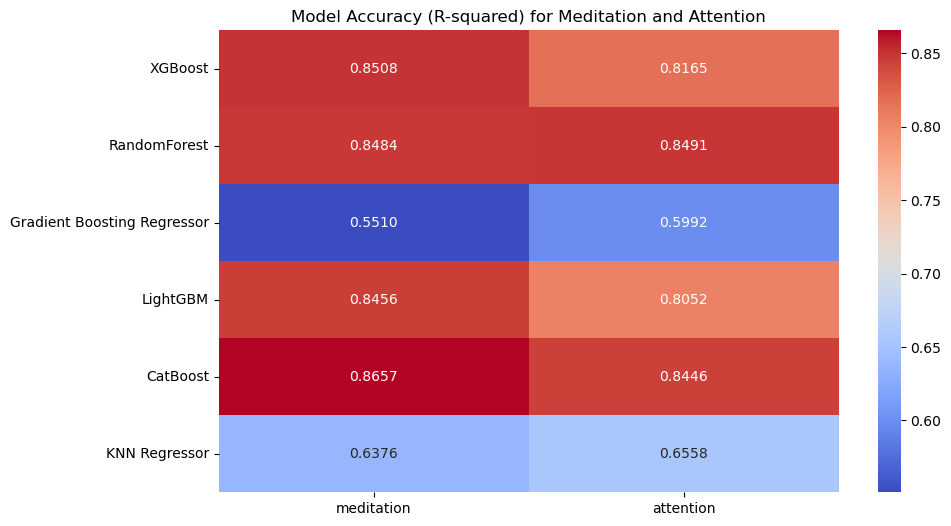

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.preprocessing import StandardScaler

# Function to train and evaluate models
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model, model_name, target_variable):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the accuracy dictionary
    accuracy_dict[target_variable][model_name] = r2
    
    # Print the summary with the model name and target variable
    print(f"\n{model_name} - Prediction Summary for Target Variable: {target_variable.upper()}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared (Accuracy): {r2:.4f}")
    
    # Visualization: Actual vs. Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs. Predicted for {target_variable.upper()}')
    plt.show()

# Initialize an accuracy dictionary to store results
accuracy_dict = {
    "meditation": {},
    "attention": {}
}

# Define the models
models_med = {
    "XGBoost": XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=1),
    "LightGBM": lgb.LGBMRegressor(random_state=1),
    "CatBoost": cb.CatBoostRegressor(verbose=0, random_state=1),
    "KNN Regressor": KNeighborsRegressor(),
}

models_att = {
    "XGBoost": XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=1),
    "LightGBM": lgb.LGBMRegressor(random_state=1),
    "CatBoost": cb.CatBoostRegressor(verbose=0, random_state=1),
    "KNN Regressor": KNeighborsRegressor(),
}

# Step 1: Standardize the entire dataset before separation
scaler = StandardScaler()
scaled_features_cleaned = scaler.fit_transform(final_features_cleaned.drop(columns=['meditation', 'attention', 'ID_Glance'], errors='ignore'))

# Step 2: Convert the scaled features back to a DataFrame for further processing
scaled_features_cleaned_df = pd.DataFrame(scaled_features_cleaned, columns=final_features_cleaned.drop(columns=['meditation', 'attention', 'ID_Glance'], errors='ignore').columns)

# Step 3: Separate the standardized dataset into map features and sensor features
map_df, sensor_df = separate_datasets(scaled_features_cleaned_df)

# Step 4: Apply PCA to map features and combine with sensor data
map_features_pca, pca_model = apply_pca_on_map(map_df, variance_threshold=0.99)
final_combined_data = combine_pca_and_sensor_data(sensor_df, map_features_pca)

# For Meditation, exclude 'attention' and 'ID_Glance' columns from the input features
X_meditation = final_combined_data.drop(columns=['meditation', 'attention', 'ID_Glance'], errors='ignore')
y_meditation = final_features_cleaned['meditation']

# For Attention, exclude 'meditation' and 'ID_Glance' columns from the input features
X_attention = final_combined_data.drop(columns=['attention', 'meditation', 'ID_Glance'], errors='ignore')
y_attention = final_features_cleaned['attention']

# Usage for Meditation dataset:

# Split the data into training and test sets (90-10 split)
X_train_meditation, X_test_meditation, y_train_meditation, y_test_meditation = train_test_split(X_meditation, y_meditation, test_size=0.1, random_state=1)

# Train and evaluate each model for Meditation
for model_name, model in models_med.items():
    train_and_evaluate_model(X_train_meditation, X_test_meditation, y_train_meditation, y_test_meditation, model, model_name, "meditation")

# Usage for Attention dataset:

# Split the data into training and test sets (90-10 split)
X_train_attention, X_test_attention, y_train_attention, y_test_attention = train_test_split(X_attention, y_attention, test_size=0.1, random_state=1)

# Train and evaluate each model for Attention
for model_name, model in models_att.items():
    train_and_evaluate_model(X_train_attention, X_test_attention, y_train_attention, y_test_attention, model, model_name, "attention")

# Convert the accuracy dictionary to a DataFrame for better visualization
accuracy_df = pd.DataFrame(accuracy_dict)

# Display the accuracy table
print("\nAccuracy (R-squared) for Each Model and Target Variable:")
print(accuracy_df)

# Heatmap for better clarity
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Model Accuracy (R-squared) for Meditation and Attention')
plt.show()


# Applying Shap to trained Catboost for Meditation

SHAP Summary Plot for CatBoost on MEDITATION:


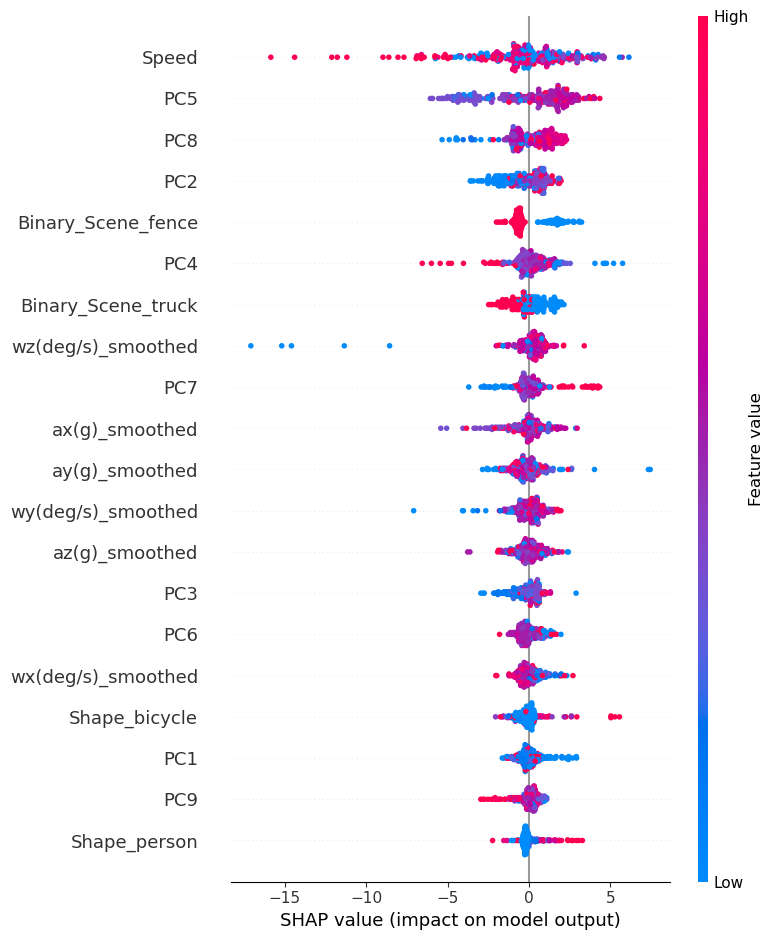

C:\Users\khixx\AppData\Local\Temp\ipykernel_10792\2597181908.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean SHAP Value', y='Feature', data=shap_mean_df, palette='viridis')


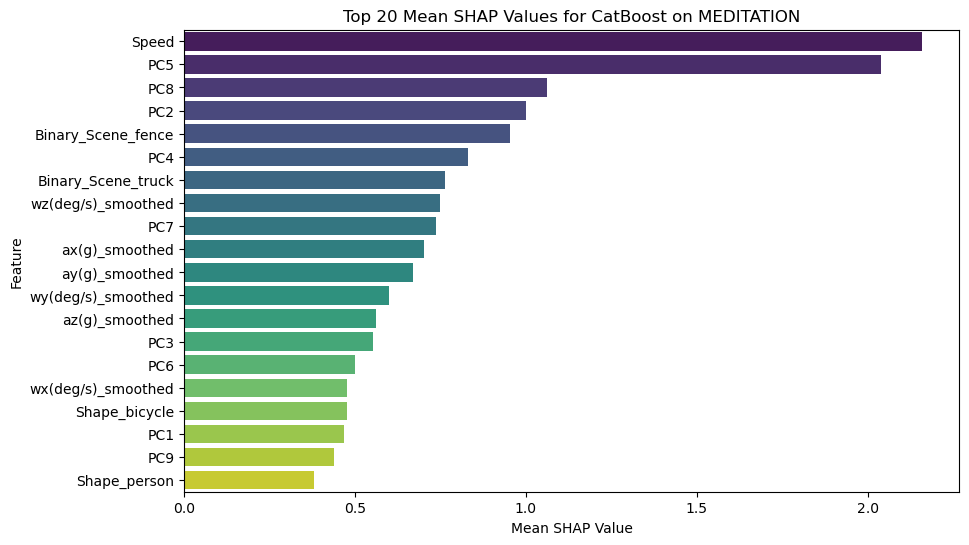

In [17]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply SHAP for CatBoost on the Meditation dataset
def explain_with_shap_catboost(model, X_train, X_test, feature_names, model_name, target_variable):
    # Initialize the SHAP explainer for CatBoost
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test)
    
    # Summary plot
    print(f"SHAP Summary Plot for {model_name} on {target_variable.upper()}:")
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)
    
    # Bar plot of mean SHAP values (Top 20 Features)
    shap_abs = np.abs(shap_values).mean(axis=0)
    shap_mean_df = pd.DataFrame(list(zip(feature_names, shap_abs)), 
                                columns=['Feature', 'Mean SHAP Value'])
    shap_mean_df = shap_mean_df.sort_values(by='Mean SHAP Value', ascending=False).head(20)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Mean SHAP Value', y='Feature', data=shap_mean_df, palette='viridis')
    plt.title(f'Top 20 Mean SHAP Values for {model_name} on {target_variable.upper()}')
    plt.show()

# Assuming CatBoost gives the highest accuracy for Meditation
catboost_model_meditation = models_med["CatBoost"]

# Use the feature names from final_combined_data (no need to drop 'meditation' again)
original_feature_names = final_combined_data.columns  # This should match your final features

# Explain CatBoost with SHAP for Meditation
explain_with_shap_catboost(catboost_model_meditation, X_train_meditation, X_test_meditation, original_feature_names, "CatBoost", "meditation")


# Applying Shap to trained Random Forest for Attention

SHAP Summary Plot for Random Forest on ATTENTION:


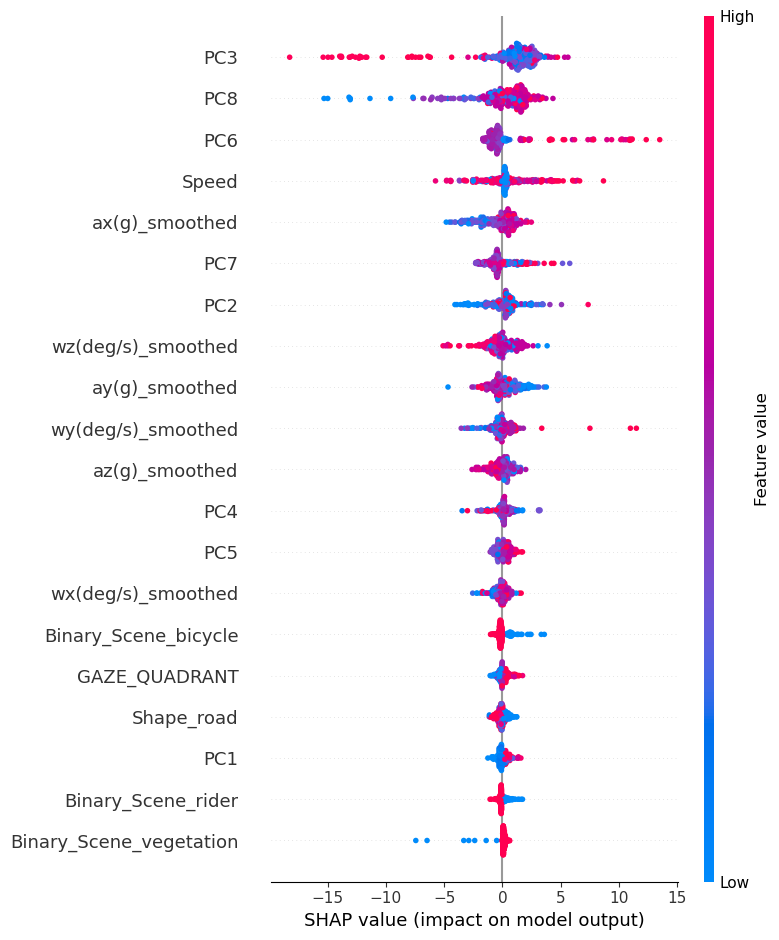

C:\Users\khixx\AppData\Local\Temp\ipykernel_10792\1081483813.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean SHAP Value', y='Feature', data=shap_mean_df, palette='viridis')


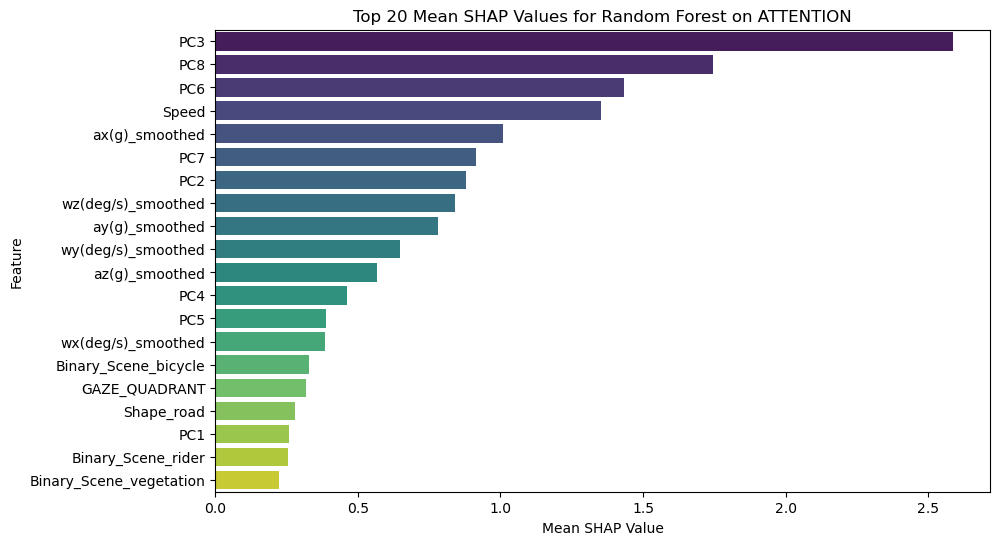

In [18]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply SHAP for Random Forest on the Attention dataset
def explain_with_shap_random_forest(model, X_train, X_test, feature_names, model_name, target_variable):
    # Initialize the SHAP explainer for Random Forest
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test)
    
    # Summary plot
    print(f"SHAP Summary Plot for {model_name} on {target_variable.upper()}:")
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)
    
    # Bar plot of mean SHAP values (Top 20 Features)
    shap_abs = np.abs(shap_values).mean(axis=0)
    shap_mean_df = pd.DataFrame(list(zip(feature_names, shap_abs)), 
                                columns=['Feature', 'Mean SHAP Value'])
    shap_mean_df = shap_mean_df.sort_values(by='Mean SHAP Value', ascending=False).head(20)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Mean SHAP Value', y='Feature', data=shap_mean_df, palette='viridis')
    plt.title(f'Top 20 Mean SHAP Values for {model_name} on {target_variable.upper()}')
    plt.show()

# Assuming Random Forest gives the highest accuracy for Attention
random_forest_model_attention = models_att["RandomForest"]

# No need to drop 'attention' as it's already excluded from final_combined_data
original_feature_names_attention = final_combined_data.columns  # This should match your final features

# Explain Random Forest with SHAP for Attention
explain_with_shap_random_forest(random_forest_model_attention, X_train_attention, X_test_attention, original_feature_names_attention, "Random Forest", "attention")


# Original Map Features Contribution to PCs

Top 8 Features Contributing to PC5 (meditation dataset):
             Feature  PC5 Loading
14   polygon_landuse    -0.607604
8      point_amenity     0.508737
4       line_service     0.376062
6       line_barrier     0.326560
0   polygon_osm_type    -0.264591
11     point_highway     0.141762
7    line_segregated     0.114106
13  polygon_building     0.109579


<Figure size 1000x600 with 0 Axes>

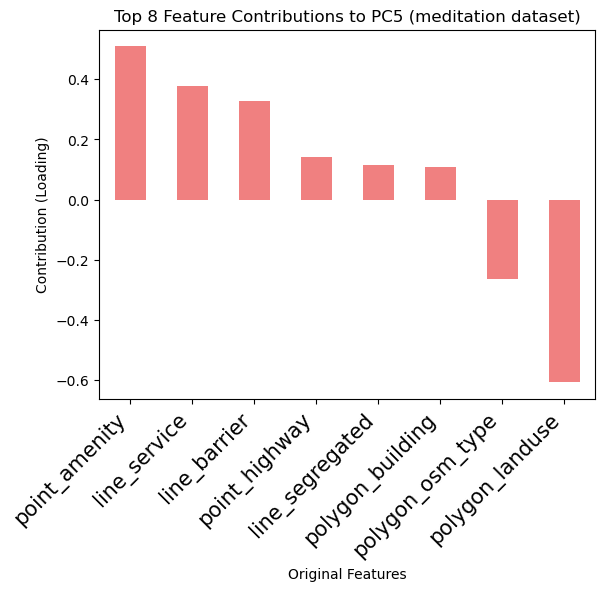

Top 8 Features Contributing to PC8 (meditation dataset):
             Feature  PC8 Loading
5       line_surface     0.671514
7    line_segregated    -0.402922
10  point_traffic_si    -0.305944
1       line_highway     0.269404
2          line_foot    -0.262738
3       line_bicycle    -0.249348
6       line_barrier    -0.177339
11     point_highway     0.152118


<Figure size 1000x600 with 0 Axes>

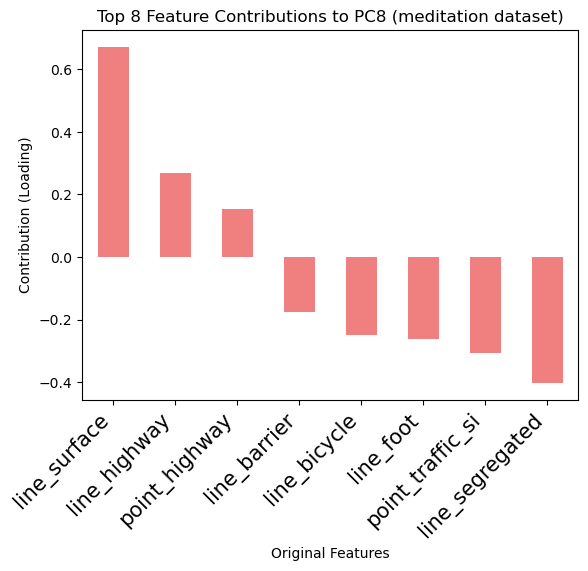

Top 8 Features Contributing to PC2 (meditation dataset):
             Feature  PC2 Loading
10  point_traffic_si     0.495314
12    point_crossing     0.470910
13  polygon_building    -0.409020
0   polygon_osm_type    -0.403707
11     point_highway     0.398374
6       line_barrier    -0.122113
5       line_surface    -0.093316
8      point_amenity    -0.082411


<Figure size 1000x600 with 0 Axes>

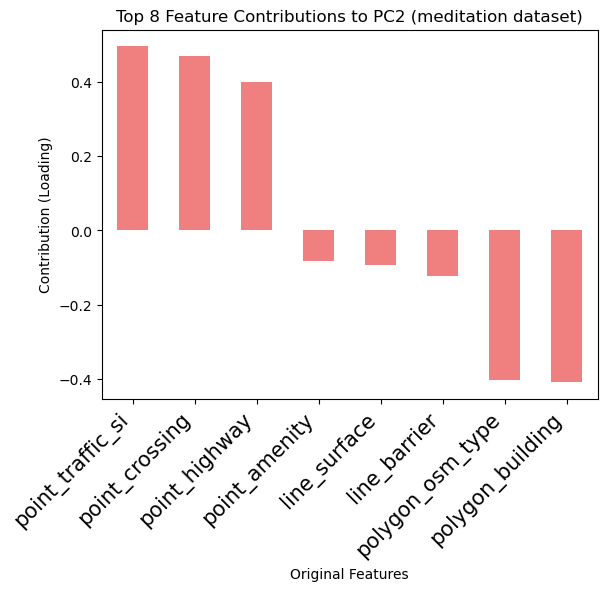

Top 8 Features Contributing to PC3 (attention dataset):
             Feature  PC3 Loading
14   polygon_landuse     0.539189
6       line_barrier     0.484862
8      point_amenity     0.438120
11     point_highway     0.350693
0   polygon_osm_type     0.298789
12    point_crossing     0.216050
10  point_traffic_si    -0.102308
5       line_surface     0.069819


<Figure size 1000x600 with 0 Axes>

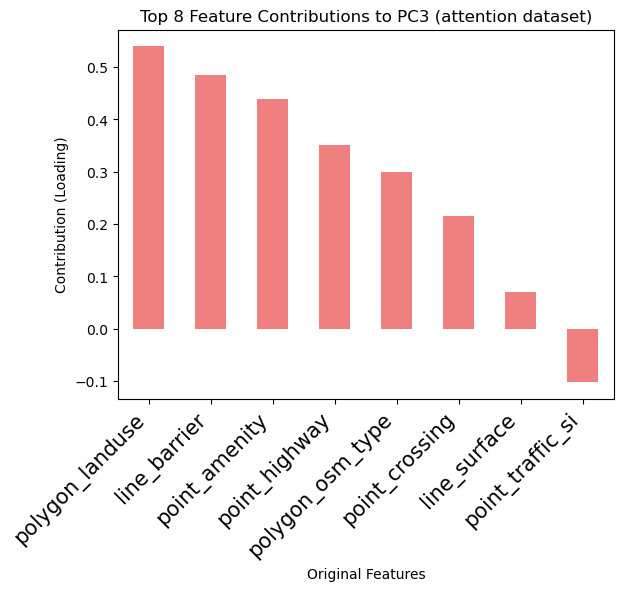

Top 8 Features Contributing to PC8 (attention dataset):
             Feature  PC8 Loading
5       line_surface     0.671514
7    line_segregated    -0.402922
10  point_traffic_si    -0.305944
1       line_highway     0.269404
2          line_foot    -0.262738
3       line_bicycle    -0.249348
6       line_barrier    -0.177339
11     point_highway     0.152118


<Figure size 1000x600 with 0 Axes>

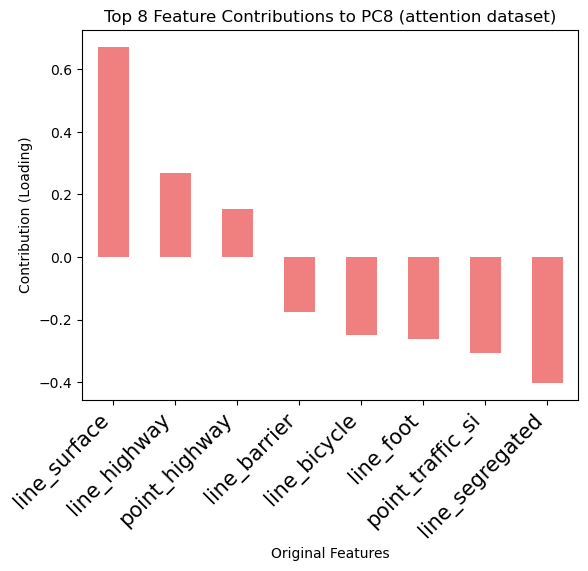

Top 8 Features Contributing to PC6 (attention dataset):
             Feature  PC6 Loading
13  polygon_building     0.495685
4       line_service     0.483639
0   polygon_osm_type     0.414519
12    point_crossing     0.262981
10  point_traffic_si     0.227904
8      point_amenity    -0.227070
11     point_highway     0.197230
7    line_segregated    -0.183288


<Figure size 1000x600 with 0 Axes>

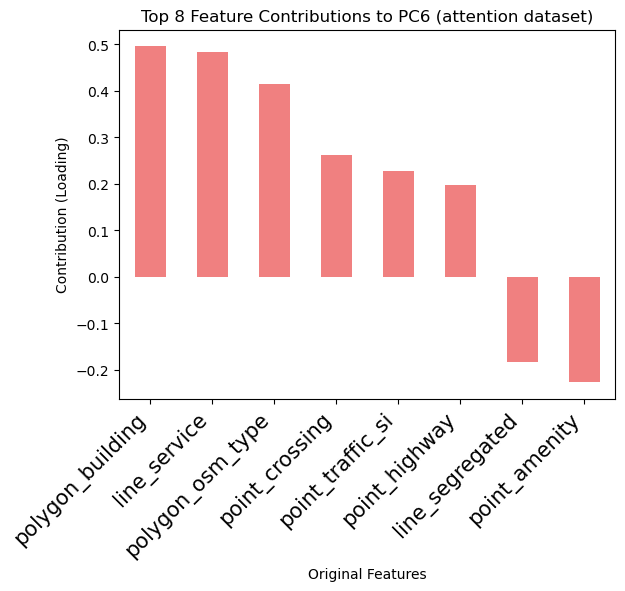

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_n_features_contributing_to_pc(pca_components, pc_number=1, n_features=10, feature_names=None, dataset_name=""):
    """
    Plots the top N features contributing to a specified principal component, showing the sign of the contributions.

    :param pca_components: NumPy array containing PCA components (loadings).
    :param pc_number: The principal component number to analyze (e.g., 1 for PC1).
    :param n_features: The number of top contributing features to display.
    :param feature_names: List of original feature names.
    :param dataset_name: The name of the dataset (e.g., "meditation" or "attention") for labeling purposes.
    """
    # Subtract 1 from pc_number to match Python's zero-based indexing
    pc_index = pc_number - 1

    # Extract the loadings for the specified principal component
    pc_loadings = pca_components[:, pc_index]
    
    # Create a DataFrame to hold feature names and their corresponding loadings
    loadings_df = pd.DataFrame({
        'Feature': feature_names,
        f'PC{pc_number} Loading': pc_loadings
    })

    # Get the top N features by their absolute contribution, but keep the original sign
    top_n_features = loadings_df.reindex(loadings_df[f'PC{pc_number} Loading'].abs().sort_values(ascending=False).head(n_features).index)

    # Display the top N features contributing to the selected PC with their signs
    print(f"Top {n_features} Features Contributing to PC{pc_number} ({dataset_name} dataset):")
    print(top_n_features)

    # Bar plot to visualize the contributions of the top N features
    plt.figure(figsize=(10, 6))
    top_n_features.sort_values(by=f'PC{pc_number} Loading', ascending=False).plot(
        kind='bar', 
        x='Feature', 
        y=f'PC{pc_number} Loading', 
        color='lightcoral',
        legend=False
    )
    plt.title(f'Top {n_features} Feature Contributions to PC{pc_number} ({dataset_name} dataset)')
    plt.xlabel('Original Features')
    plt.ylabel('Contribution (Loading)')
    plt.xticks(rotation=45, ha='right', fontsize=15)
    plt.show()

# Assuming map_df contains the map features for meditation and attention
# and pca_model is the PCA model used to transform the map features

# Example usage for the map features in the meditation dataset
plot_top_n_features_contributing_to_pc(pca_model.components_.T, pc_number=5, n_features=8, feature_names=map_df.columns, dataset_name="meditation")
plot_top_n_features_contributing_to_pc(pca_model.components_.T, pc_number=8, n_features=8, feature_names=map_df.columns, dataset_name="meditation")
plot_top_n_features_contributing_to_pc(pca_model.components_.T, pc_number=2, n_features=8, feature_names=map_df.columns, dataset_name="meditation")

# Example usage for the map features in the attention dataset (use the same pca_model as map_df is the same for both)
plot_top_n_features_contributing_to_pc(pca_model.components_.T, pc_number=3, n_features=8, feature_names=map_df.columns, dataset_name="attention")
plot_top_n_features_contributing_to_pc(pca_model.components_.T, pc_number=8, n_features=8, feature_names=map_df.columns, dataset_name="attention")
plot_top_n_features_contributing_to_pc(pca_model.components_.T, pc_number=6, n_features=8, feature_names=map_df.columns, dataset_name="attention")


# Converting PCs Back to Original Map features - Meditation (CATBoost)

SHAP Summary Plot for CatBoost on MEDITATION (Map Features):


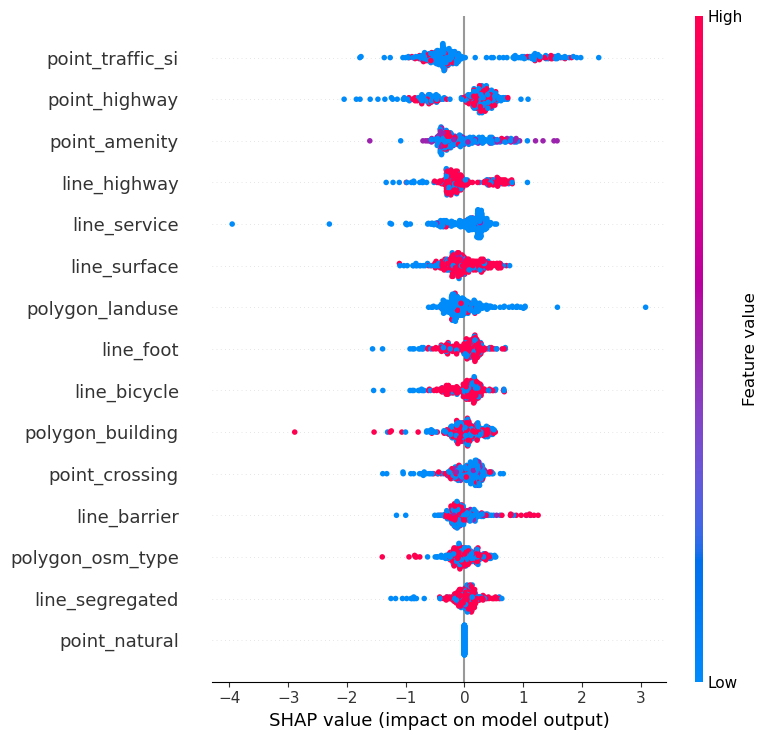

C:\Users\khixx\AppData\Local\Temp\ipykernel_10792\3440809767.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean SHAP Value', y='Feature', data=shap_mean_df, palette='viridis')


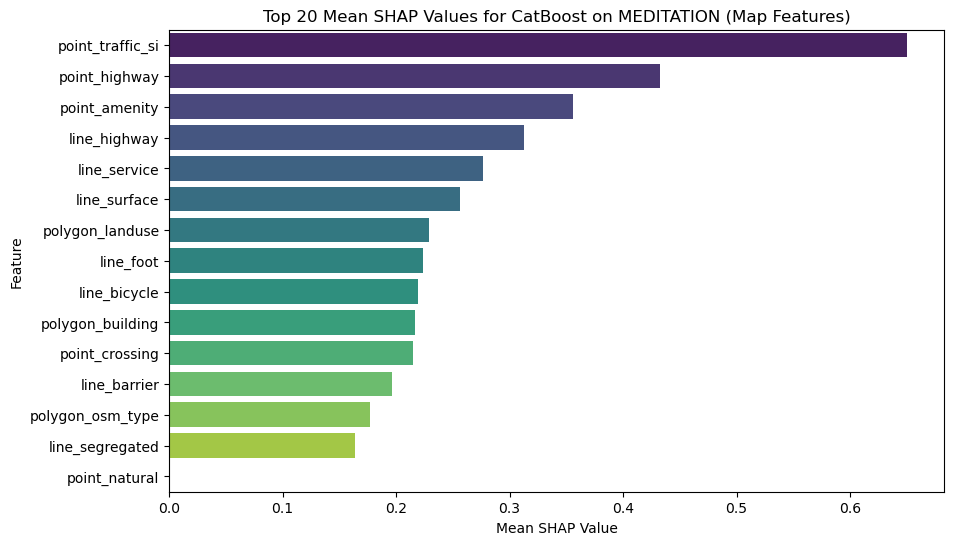

In [20]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming final_feat_meditation contains both map and sensor features
# and map_df contains only the map-related features.
meditation_map_df = map_df

# Step 2: Standardize the map data
scaler = StandardScaler()
scaled_map_features = scaler.fit_transform(meditation_map_df)

# Combine PCA and sensor data (from previous steps)
final_combined_data = combine_pca_and_sensor_data(sensor_df, map_features_pca)

# Function to map SHAP values back to original map features
def map_shap_to_original_map_features(shap_values_pc, pca_components, map_feature_names):
    """
    Map SHAP values for PCA components back to original map features.
    
    :param shap_values_pc: SHAP values in terms of PCA components.
    :param pca_components: PCA components (loadings).
    :param map_feature_names: Names of the original map features.
    :return: DataFrame of SHAP values mapped to original map features.
    """
    if shap_values_pc.shape[1] != pca_components.shape[0]:
        raise ValueError(f"Mismatch between SHAP values shape {shap_values_pc.shape} and PCA components shape {pca_components.shape}.")
    
    # Map SHAP values to original map features using the PCA loadings
    shap_values_mapped = np.dot(shap_values_pc, pca_components)
    
    # Create a DataFrame for the SHAP values mapped to original map features
    shap_values_mapped_df = pd.DataFrame(shap_values_mapped, columns=map_feature_names)
    
    return shap_values_mapped_df

# SHAP explanation for PCA components mapped to original map features
def explain_shap_for_map_features(model, X_train_combined, X_test_combined, original_test_data, original_map_values, pca_model, model_name, target_variable, map_feature_names):
    """
    Explains SHAP values for a model, mapping PCA components back to original map features.
    
    :param model: Trained model.
    :param X_train_combined: Training data (PCA + sensor).
    :param X_test_combined: Test data (PCA + sensor).
    :param original_test_data: Original scaled test data (PCA components).
    :param original_map_values: Original (unstandardized) map feature values.
    :param pca_model: PCA model used for dimensionality reduction.
    :param model_name: Name of the model.
    :param target_variable: Target variable (e.g., "meditation").
    :param map_feature_names: Names of the original map features.
    """
    # Initialize the SHAP explainer
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for the test set (in terms of combined data)
    shap_values_combined = explainer.shap_values(X_test_combined)
    
    # Extract SHAP values corresponding to PCA components (the first N columns)
    shap_values_pc = shap_values_combined[:, :pca_model.components_.shape[0]]
    
    # Map SHAP values back to original map features
    shap_values_mapped_df = map_shap_to_original_map_features(shap_values_pc, pca_model.components_, map_feature_names)
    
    # SHAP summary plot for original map features using the original test data
    print(f"SHAP Summary Plot for {model_name} on {target_variable.upper()} (Map Features):")
    shap.summary_plot(shap_values_mapped_df.values, original_test_data, feature_names=map_feature_names)
    
    # Bar plot of mean SHAP values for original map features (Top 20)
    shap_abs_mean = np.abs(shap_values_mapped_df).mean(axis=0)
    shap_mean_df = pd.DataFrame(list(zip(map_feature_names, shap_abs_mean)), 
                                columns=['Feature', 'Mean SHAP Value'])
    shap_mean_df = shap_mean_df.sort_values(by='Mean SHAP Value', ascending=False).head(20)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Mean SHAP Value', y='Feature', data=shap_mean_df, palette='viridis')
    plt.title(f'Top 20 Mean SHAP Values for {model_name} on {target_variable.upper()} (Map Features)')
    plt.show()
    
#     # Plot SHAP dependence plots for the top 5 influential features
#     top_5_features = shap_mean_df['Feature'].head(5)
#     for feature in top_5_features:
#         feature_index = list(map_feature_names).index(feature)  # Get the index of the feature
#         print(f"SHAP Dependence Plot for {feature}:")
#         shap.dependence_plot(
#             feature_index, 
#             shap_values_mapped_df.values, 
#             original_map_values,  # Use original (unstandardized) feature values here
#             feature_names=map_feature_names
#         )

# Example: Assuming CatBoost gives the highest accuracy for Meditation
catboost_model_meditation = models_med["CatBoost"]

# Split the combined data (PCA + sensor) into train and test sets and capture indices
X_train_combined, X_test_combined, y_train_meditation, y_test_meditation, train_indices, test_indices = train_test_split(
    final_combined_data, y_meditation, np.arange(len(final_combined_data)), test_size=0.1, random_state=1
)

# Get the corresponding test data from the original map features before PCA
original_map_test_values = meditation_map_df.values[test_indices]  # Get original (unstandardized) map feature values
scaled_test_data = scaled_map_features[test_indices]  # Scaled map test data

# Explain SHAP for CatBoost mapped to original map features
explain_shap_for_map_features(
    catboost_model_meditation, 
    X_train_combined, 
    X_test_combined, 
    scaled_test_data, 
    original_map_test_values,  # Original unstandardized map feature values
    pca_model,  # PCA model used for transformation
    "CatBoost", 
    "meditation", 
    meditation_map_df.columns  # Original map feature names
)


# Converting PCs Back to Original Map features - Attention (Random Forrest)

SHAP Summary Plot for RandomForest on ATTENTION (Map Features):


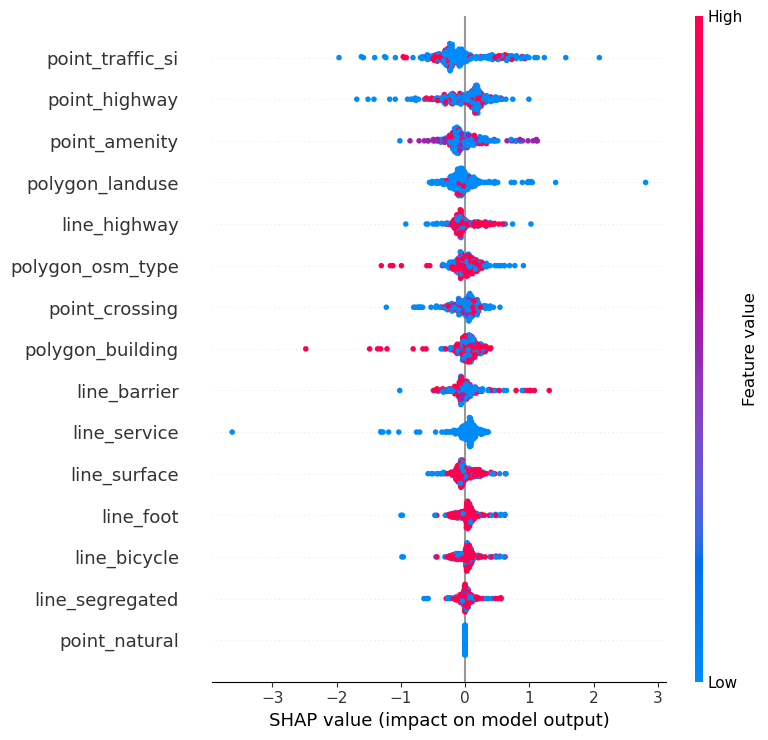

C:\Users\khixx\AppData\Local\Temp\ipykernel_10792\3151992805.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean SHAP Value', y='Feature', data=shap_mean_df, palette='viridis')


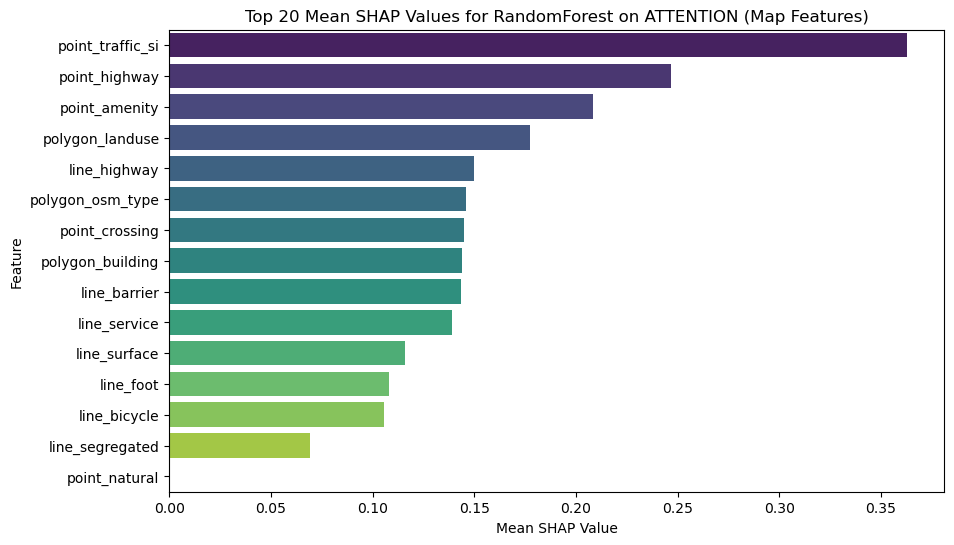

In [21]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming final_feat_meditation contains both map and sensor features
# and map_df contains only the map-related features.
attention_map_df = map_df

# Step 2: Standardize the map data
scaler = StandardScaler()
scaled_map_features = scaler.fit_transform(attention_map_df)

# Combine PCA and sensor data (from previous steps)
final_combined_data = combine_pca_and_sensor_data(sensor_df, map_features_pca)

# Function to map SHAP values back to original map features
def map_shap_to_original_map_features(shap_values_pc, pca_components, map_feature_names):
    """
    Map SHAP values for PCA components back to original map features.
    
    :param shap_values_pc: SHAP values in terms of PCA components.
    :param pca_components: PCA components (loadings).
    :param map_feature_names: Names of the original map features.
    :return: DataFrame of SHAP values mapped to original map features.
    """
    if shap_values_pc.shape[1] != pca_components.shape[0]:
        raise ValueError(f"Mismatch between SHAP values shape {shap_values_pc.shape} and PCA components shape {pca_components.shape}.")
    
    # Map SHAP values to original map features using the PCA loadings
    shap_values_mapped = np.dot(shap_values_pc, pca_components)
    
    # Create a DataFrame for the SHAP values mapped to original map features
    shap_values_mapped_df = pd.DataFrame(shap_values_mapped, columns=map_feature_names)
    
    return shap_values_mapped_df

# SHAP explanation for PCA components mapped to original map features
def explain_shap_for_map_features(model, X_train_combined, X_test_combined, original_test_data, original_map_values, pca_model, model_name, target_variable, map_feature_names):
    """
    Explains SHAP values for a model, mapping PCA components back to original map features.
    
    :param model: Trained model.
    :param X_train_combined: Training data (PCA + sensor).
    :param X_test_combined: Test data (PCA + sensor).
    :param original_test_data: Original scaled test data (PCA components).
    :param original_map_values: Original (unstandardized) map feature values.
    :param pca_model: PCA model used for dimensionality reduction.
    :param model_name: Name of the model.
    :param target_variable: Target variable (e.g., "attention").
    :param map_feature_names: Names of the original map features.
    """
    # Initialize the SHAP explainer
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for the test set (in terms of combined data)
    shap_values_combined = explainer.shap_values(X_test_combined)
    
    # Extract SHAP values corresponding to PCA components (the first N columns)
    shap_values_pc = shap_values_combined[:, :pca_model.components_.shape[0]]
    
    # Map SHAP values back to original map features
    shap_values_mapped_df = map_shap_to_original_map_features(shap_values_pc, pca_model.components_, map_feature_names)
    
    # SHAP summary plot for original map features using the original test data
    print(f"SHAP Summary Plot for {model_name} on {target_variable.upper()} (Map Features):")
    shap.summary_plot(shap_values_mapped_df.values, original_test_data, feature_names=map_feature_names)
    
    # Bar plot of mean SHAP values for original map features (Top 20)
    shap_abs_mean = np.abs(shap_values_mapped_df).mean(axis=0)
    shap_mean_df = pd.DataFrame(list(zip(map_feature_names, shap_abs_mean)), 
                                columns=['Feature', 'Mean SHAP Value'])
    shap_mean_df = shap_mean_df.sort_values(by='Mean SHAP Value', ascending=False).head(20)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Mean SHAP Value', y='Feature', data=shap_mean_df, palette='viridis')
    plt.title(f'Top 20 Mean SHAP Values for {model_name} on {target_variable.upper()} (Map Features)')
    plt.show()
    
#     # Plot SHAP dependence plots for the top 5 influential features
#     top_5_features = shap_mean_df['Feature'].head(5)
#     for feature in top_5_features:
#         feature_index = list(map_feature_names).index(feature)  # Get the index of the feature
#         print(f"SHAP Dependence Plot for {feature}:")
#         shap.dependence_plot(
#             feature_index, 
#             shap_values_mapped_df.values, 
#             original_map_values,  # Use original (unstandardized) feature values here
#             feature_names=map_feature_names
#         )

# Example: Assuming CatBoost gives the highest accuracy for Meditation
RandomForest_model_attention = models_med["RandomForest"]

# Split the combined data (PCA + sensor) into train and test sets and capture indices
X_train_combined, X_test_combined, y_train_meditation, y_test_meditation, train_indices, test_indices = train_test_split(
    final_combined_data, y_meditation, np.arange(len(final_combined_data)), test_size=0.1, random_state=1
)

# Get the corresponding test data from the original map features before PCA
original_map_test_values = meditation_map_df.values[test_indices]  # Get original (unstandardized) map feature values
scaled_test_data = scaled_map_features[test_indices]  # Scaled map test data

# Explain SHAP for CatBoost mapped to original map features
explain_shap_for_map_features(
    RandomForest_model_attention, 
    X_train_combined, 
    X_test_combined, 
    scaled_test_data, 
    original_map_test_values,  # Original unstandardized map feature values
    pca_model,  # PCA model used for transformation
    "RandomForest", 
    "attention", 
    attention_map_df.columns  # Original map feature names
)
